In [7]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
from matplotlib import style
style.use('dark_background')
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Create a dataset

In [8]:
X, y = make_blobs(n_samples = 2000, n_features = 5)
X.shape

(2000, 5)

# Standardized the data

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Applying PCA

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-2.15946182, -0.75301319],
       [-1.74848415, -0.76463272],
       [-1.89510647, -0.93735823],
       ...,
       [-0.5529759 ,  0.93362557],
       [ 2.78029685, -0.10425932],
       [ 2.39117816, -0.45214466]])

# Finding Variance Ratio

In [11]:
print(pca.explained_variance_ratio_)

[0.81982147 0.14720052]


In [12]:
print(np.sum(pca.explained_variance_ratio_))

0.9670219946664984


# Elbow Method for Optimal Clusters

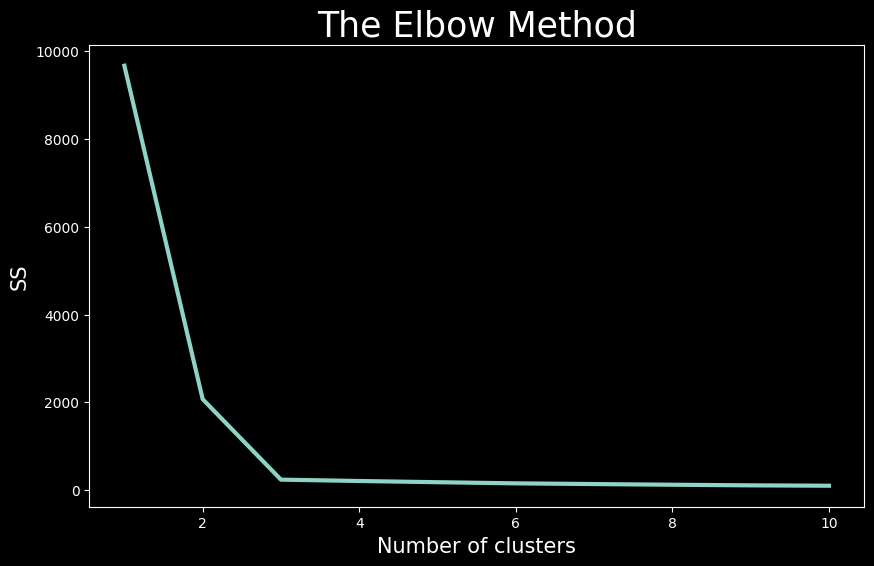

In [13]:
from sklearn.cluster import KMeans
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_pca)
    ss.append(kmeans.inertia_) # kmeans.inertia_ will give us wcss value
plt.figure(figsize = (10,6))
plt.plot(range(1, 11), ss, lw = 3)
plt.title('The Elbow Method', fontsize = 25)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('SS', fontsize =15 )
plt.show()

# Applying KMeans Clustering

In [14]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(X_pca)

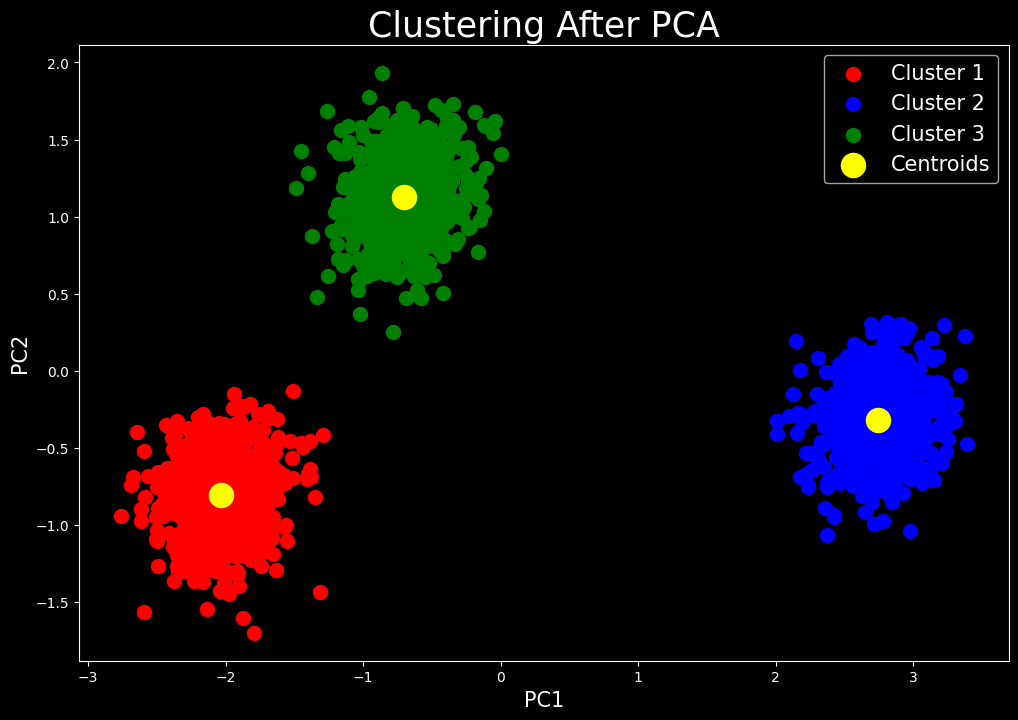

In [15]:
plt.figure(figsize = (12,8))
plt.scatter(X_pca[y_pred == 0, 0], X_pca[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_pca[y_pred == 1, 0], X_pca[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_pca[y_pred == 2, 0], X_pca[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clustering After PCA', fontsize = 25)
plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()